In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from glob import glob
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [8]:
cough_heavy_list = []
covid_status_list = []

metadatafiles = glob("metadata/*/metadata.json")
with open(metadatafiles[0]) as file:
    json_data = json.load(file)
    cough_heavy_np = np.array(json_data["cough_heavy"])
    cough_heavy.append(cough_heavy_np)
    covid_status_list.append(json_data["covid_status"])


with open('cough.json') as file:
    json_data = json.load(file)
    cough_heavy =  np.array(json_data["cough"])
    covid_status = np.array(json_data["covid_status"])
    ids = np.array(json_data["ids"])

np.array(["cough_heavy"])
for metadatafile in metadatafiles[:2]:
    try:
        with open(metadatafile) as f:
            metadata = json.load(f)
            if "cough_heavy" in metadata and "covid_status_num" in metadata:
                cough_heavy = metadata["cough_heavy"]
                np_cough_heavy = np.array(cough_heavy)
                cough_heavy_list.append(np_cough_heavy)
                covid_status_list.append(metadata["covid_status_num"])
    except:
        continue
print(len(cough_heavy_list))
#print(cough_heavy_list.shape)
print(len(covid_status_list))
X = np.array(cough_heavy_list)
print(X.shape)
y = np.array(covid_status_list)

FileNotFoundError: [Errno 2] No such file or directory: 'cough.json'

In [5]:
metadatafiles = glob("Extracted_data/*/*/metadata.json")
metadatafile = metadatafiles[0]
with open(metadatafile) as f:
    metadata = json.load(f)
    cough_heavy = metadata["cough_heavy"]
    np_cough_heavy = np.array(cough_heavy)
print(np_cough_heavy.shape)
cough_heavy_list = []
covid_status_list = []
for metadatafile in metadatafiles[:]:
    try:
        with open(metadatafile) as f:
            metadata = json.load(f)
            if "cough_heavy" in metadata and "covid_status_num" in metadata:
                cough_heavy = metadata["cough_heavy"]
                cough_heavy_list.append(np_cough_heavy)
                covid_status_list.append(metadata["covid_status_num"])
    except:
        continue
X = np.array(cough_heavy_list)
y = np.array(covid_status_list)

(128, 265)


In [6]:
for i, v in enumerate(cough_heavy_list):
    print(v.shape)

(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)
(128, 265)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

(11, 128, 265)


(11, 128, 265)
Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 2.2498 - accuracy: 0.0909
Epoch 2/10
1/1 [==============================] - 0s 109ms/step - loss: 2.1829 - accuracy: 0.0909
Epoch 3/10
1/1 [==============================] - 0s 110ms/step - loss: 2.2672 - accuracy: 0.0909
Epoch 4/10
1/1 [==============================] - 0s 120ms/step - loss: 2.0960 - accuracy: 0.0909
Epoch 5/10
1/1 [==============================] - 0s 110ms/step - loss: 2.0592 - accuracy: 0.0909
Epoch 6/10
1/1 [==============================] - 0s 120ms/step - loss: 2.0830 - accuracy: 0.1818
Epoch 7/10
1/1 [==============================] - 0s 110ms/step - loss: 2.1107 - accuracy: 0.1818
Epoch 8/10
1/1 [==============================] - 0s 110ms/step - loss: 2.1286 - accuracy: 0.0909
Epoch 9/10
1/1 [==============================] - 0s 111ms/step - loss: 2.0534 - accuracy: 0.1818
Epoch 10/10
1/1 [==============================] - 0s 113ms/step - loss: 2.1106 - accuracy: 0.0000e+00


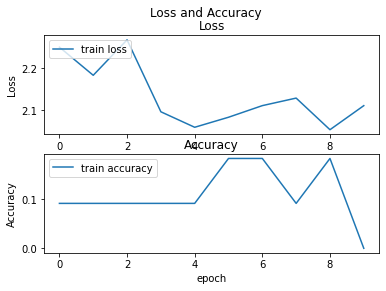

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax'),
])
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

fig, axs = plt.subplots(2)
fig.suptitle('Loss and Accuracy')
axs[0].plot(history.history['loss'], label='train loss')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper left')
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'], label='train accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(loc='upper left')
axs[1].set_title('Accuracy')
plt.show()


In [9]:
model.save('./models/cough_model.h5')

In [10]:
model = keras.models.load_model('./models/cough_model.h5')

In [11]:
audio_files = glob("Extracted_data/*/*/cough-heavy.wav")
audio_file = audio_files[0]
y, sr = librosa.load(audio_file)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
print(S_dB_mel.shape)
audio_file = audio_files[1]
y, sr = librosa.load(audio_file)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
print(S_dB_mel.shape)


C:\Users\subas\AppData\Local\Temp\ipykernel_17568\1482397252.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.5762478e-06
 -1.8640995e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)


(128, 265)
(128, 350)


C:\Users\subas\AppData\Local\Temp\ipykernel_17568\1482397252.py:9: FutureWarning: Pass y=[-0.00106505 -0.00121813  0.00027772 ... -0.00605121 -0.00669382
 -0.00699562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)


In [12]:
model.evaluate(X_test,  y_test, verbose=2)


1/1 - 1s - loss: 1.9991 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step


[1.9991090297698975, 0.0]

In [15]:
audio_file = "./cough-heavy.wav"
y,sr = librosa.load(audio_file)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
#128, 225

S_dB_mel = S_dB_mel[:128, :225]
fig,ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_dB_mel, y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()
S_dB_mel_np_arr = np.array([S_dB_mel])
print(S_dB_mel_np_arr.shape)
# p = model.predict(S_dB_mel_np_arr)
# p = np.argmax(p, axis=1)
# print(p)

FileNotFoundError: [Errno 2] No such file or directory: './cough-heavy.wav'